# Import libraries

In [1208]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Load & Read the data

In [1209]:
df = pd.read_csv("heart.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [1210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# Data Preprocessing

In [1211]:
missing_values = df.isnull().sum()
missing_values

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [1212]:
df.drop(columns=["ca"], inplace=True)

In [1213]:
df = df.drop(columns=["id", "dataset"], axis=1)

In [1214]:
df.dropna(inplace=True)

In [1215]:
'''num_cols = ["trestbps", "chol", "thalch", "oldpeak"]
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())
    

cat_cols = ["slope", "restecg", "exang"]
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0],  inplace=True)'''

'num_cols = ["trestbps", "chol", "thalch", "oldpeak"]\nfor col in num_cols:\n    df[col] = df[col].fillna(df[col].mean())\n    \n\ncat_cols = ["slope", "restecg", "exang"]\nfor col in cat_cols:\n    df[col] = df[col].fillna(df[col].mode()[0],  inplace=True)'

In [1216]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [1217]:
df.duplicated().sum()

0

In [1218]:
df.drop_duplicates(inplace=True)

In [1219]:
df.dtypes

age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [1220]:
categorical_cols = ["sex", "cp", "restecg", "exang", "slope","thal", "fbs"]

for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [1221]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,1,2
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,1,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,1,0


In [1222]:
df.dtypes

age           int64
sex           int32
cp            int32
trestbps    float64
chol        float64
fbs           int32
restecg       int32
thalch      float64
exang         int32
oldpeak     float64
slope         int32
thal          int32
num           int64
dtype: object

In [1223]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Exploratory Data Analysis (EDA)

In [1224]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,54.757412,0.722372,0.857143,132.137466,215.469003,0.137466,0.644205,143.711590,0.396226,1.013747,1.336927,1.353100,1.083558
std,9.037186,0.448434,1.017985,17.930797,97.011484,0.344804,0.590545,25.961934,0.489773,1.118179,0.608241,0.621124,1.241631
min,29.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,197.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,56.000000,1.000000,0.000000,130.000000,233.000000,0.000000,1.000000,147.000000,0.000000,0.800000,1.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,270.500000,0.000000,1.000000,163.000000,1.000000,1.600000,2.000000,2.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,2.000000,4.000000


In [1225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371 entries, 0 to 903
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       371 non-null    int64  
 1   sex       371 non-null    int32  
 2   cp        371 non-null    int32  
 3   trestbps  371 non-null    float64
 4   chol      371 non-null    float64
 5   fbs       371 non-null    int32  
 6   restecg   371 non-null    int32  
 7   thalch    371 non-null    float64
 8   exang     371 non-null    int32  
 9   oldpeak   371 non-null    float64
 10  slope     371 non-null    int32  
 11  thal      371 non-null    int32  
 12  num       371 non-null    int64  
dtypes: float64(4), int32(7), int64(2)
memory usage: 30.4 KB


In [1226]:
df['num'].value_counts()

num
0    171
1     82
3     52
2     50
4     16
Name: count, dtype: int64

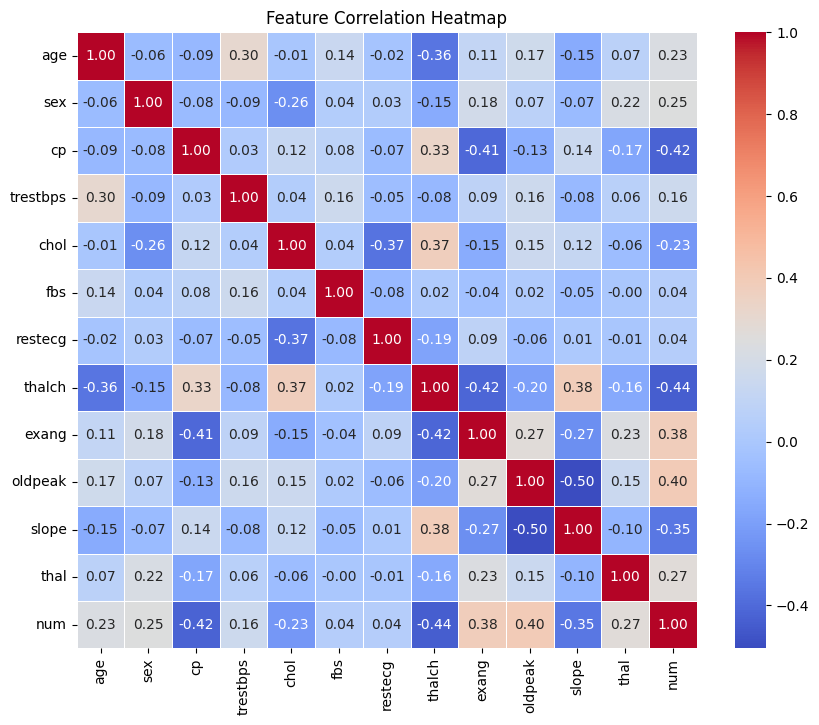

In [1227]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [1228]:
y = df["num"]

In [1229]:
target_num = df.num.value_counts()

In [1230]:
#df['sex'].unique()

#sns.barplot(x=df['sex'], y=y)

In [1231]:
df.shape

(371, 13)

In [1232]:
print("Percentage of patience without heart problems: "+str(round(target_num[0]*100/918, 2))+" %")
heart_problem_count = target_num[1] + target_num[2] + target_num[3] + target_num[4]
print("Percentage of patients with heart problems: " + str(round(heart_problem_count * 100 / 918, 2))+' %')

Percentage of patience without heart problems: 18.63 %
Percentage of patients with heart problems: 21.79 %


<Axes: xlabel='cp', ylabel='num'>

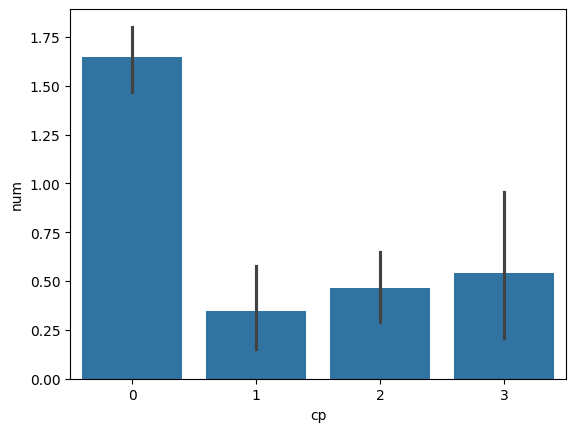

In [1233]:
sns.barplot(x=df['cp'], y=y)


<Axes: xlabel='restecg', ylabel='num'>

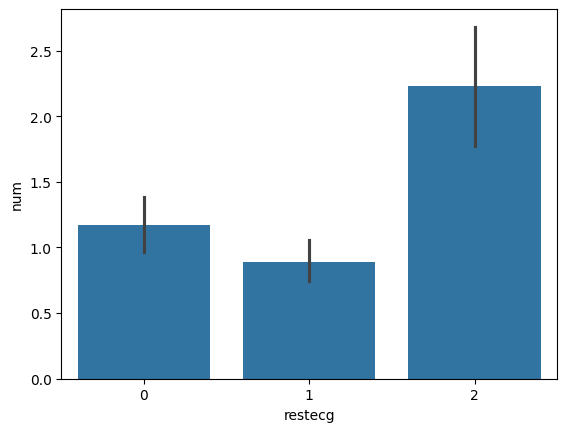

In [1234]:
sns.barplot(x=df['restecg'], y=y)

<Axes: xlabel='exang', ylabel='num'>

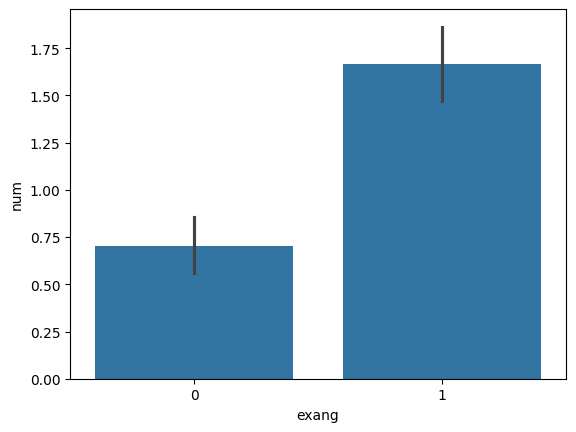

In [1235]:
sns.barplot(x=df['exang'], y=y)

<Axes: xlabel='slope', ylabel='num'>

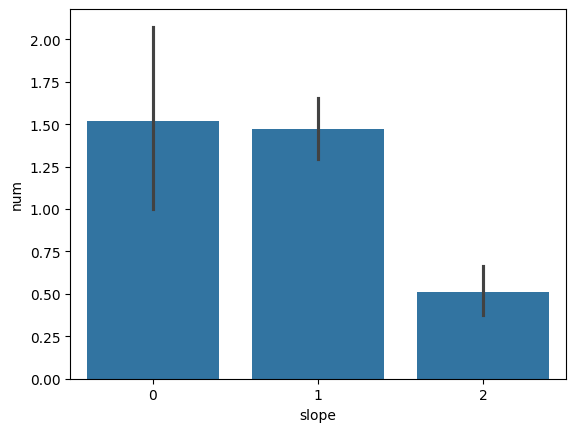

In [1236]:
sns.barplot(x=df['slope'], y=y)

# Feature Engineering

In [1237]:
correlation = df.corr()['num'].abs().sort_values(ascending=False)
print("Correlation with target variable (num):")
print(correlation)

Correlation with target variable (num):
num         1.000000
thalch      0.444459
cp          0.422463
oldpeak     0.399018
exang       0.380959
slope       0.352308
thal        0.266532
sex         0.245648
chol        0.232132
age         0.225093
trestbps    0.158876
restecg     0.044341
fbs         0.042540
Name: num, dtype: float64


In [1238]:
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop(columns=['num'], inplace=True)

In [1239]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,54.757412,0.722372,0.857143,132.137466,215.469003,0.137466,0.644205,143.711590,0.396226,1.013747,1.336927,1.353100,0.539084
std,9.037186,0.448434,1.017985,17.930797,97.011484,0.344804,0.590545,25.961934,0.489773,1.118179,0.608241,0.621124,0.499143
min,29.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,197.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,56.000000,1.000000,0.000000,130.000000,233.000000,0.000000,1.000000,147.000000,0.000000,0.800000,1.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,270.500000,0.000000,1.000000,163.000000,1.000000,1.600000,2.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,2.000000,1.000000


In [1240]:
df['heart_rate_reserve'] = (202 - df['age']) - df['thalch']
df['high_bp'] = (df['trestbps'] > 140).astype(int)
df['high_chol'] = (df['chol'] > 240).astype(int)

In [1241]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'target', 'heart_rate_reserve',
       'high_bp', 'high_chol'],
      dtype='object')

In [1242]:
X = df.drop('target', axis=1)
y = df['target']

In [1243]:
pca = PCA(n_components=0.90) 
X_pca = pca.fit_transform(X_scaled)

In [1244]:
print(f"Number of principal components selected: {X_pca.shape[1]}")

Number of principal components selected: 10


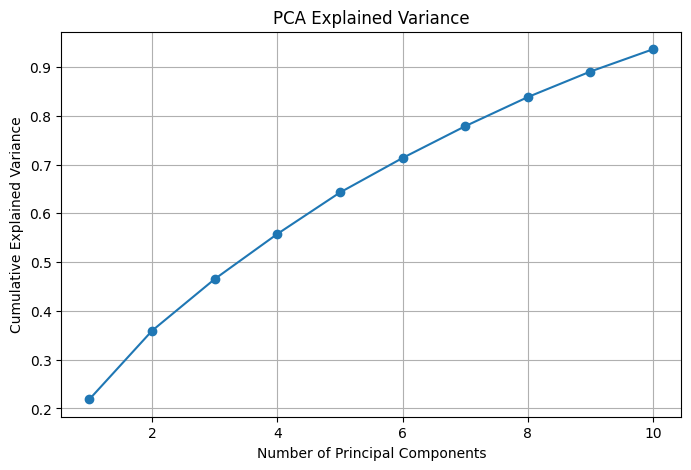

In [1245]:

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()


# Split The Data into Train & Test

In [1246]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.4, random_state=42, stratify=y)

In [1247]:
X_train.shape, X_test.shape

((222, 10), (149, 10))

# Choose and Train a Model

In [1248]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [1249]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [1250]:
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
GB.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

# Hyperamter Tuning (Optimization)

In [ ]:
param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [20, 30, 40],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters found by GridSearchCV:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy after GridSearchCV:", accuracy)


# Model Prediction

In [ ]:
y_pred_lr = lr.predict(X_test)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
y_pred_GB = GB.predict(X_test)

# Evaluate the Model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Model Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77        69
           1       0.78      0.86      0.82        80

    accuracy                           0.80       149
   macro avg       0.80      0.79      0.80       149
weighted avg       0.80      0.80      0.80       149

Confusion Matrix:
 [[50 19]
 [11 69]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"LR Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred_lr))

conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_matrix)

LR Model Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        69
           1       0.82      0.88      0.85        80

    accuracy                           0.83       149
   macro avg       0.83      0.83      0.83       149
weighted avg       0.83      0.83      0.83       149

Confusion Matrix:
 [[54 15]
 [10 70]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"RF Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred_rf))

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix)

RF Model Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.72      0.78        69
           1       0.79      0.88      0.83        80

    accuracy                           0.81       149
   macro avg       0.81      0.80      0.80       149
weighted avg       0.81      0.81      0.80       149

Confusion Matrix:
 [[50 19]
 [10 70]]


In [ ]:
accuracy = accuracy_score(y_test, y_pred_GB)
print(f"GB Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred_GB))

conf_matrix = confusion_matrix(y_test, y_pred_GB)
print("Confusion Matrix:\n", conf_matrix)

GB Model Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77        69
           1       0.78      0.88      0.82        80

    accuracy                           0.80       149
   macro avg       0.80      0.79      0.79       149
weighted avg       0.80      0.80      0.80       149

Confusion Matrix:
 [[49 20]
 [10 70]]
